<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Natural_Language_Processing/blob/main/Project_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_path = "/content/drive/MyDrive/NLP-Project/yelp_dataset"

- Set the path of dataset

# Pre-Processing

In [3]:
import os
import json
import pandas as pd
filename = 'yelp_academic_dataset_business.json'
data = []

with open(os.path.join(folder_path, filename), 'r') as f:
    for line in f:
        try:
            json_data = json.loads(line)
            if 'review_count' in json_data and json_data['review_count'] > 50:
                data.append(json_data)
                if len(data) >= 10:
                    break
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON in {filename}: {e}")

business_df = pd.DataFrame(data)
business_df.head()

business_id                     name             address  \
0  MTSW4McQd7CbVtyjqoe9mw       St Honore Pastries         935 Race St   
1  0bPLkL0QhhPO5kt1_EXmNQ     Zio's Italian Market       2575 E Bay Dr   
2  MUTTqe8uqyMdBl186RmNeA                 Tuna Bar         205 Race St   
3  ROeacJQwBeh05Rqg7F6TCg                      BAP       1224 South St   
4  9OG5YkX1g2GReZM0AskizA  Romano's Macaroni Grill  5505 S Virginia St   

           city state postal_code   latitude   longitude  stars  review_count  \
0  Philadelphia    PA       19107  39.955505  -75.155564    4.0            80   
1         Largo    FL       33771  27.916116  -82.760461    4.5           100   
2  Philadelphia    PA       19106  39.953949  -75.143226    4.0           245   
3  Philadelphia    PA       19147  39.943223  -75.162568    4.5           205   
4          Reno    NV       89502  39.476117 -119.789339    2.5           339   

   is_open                                         attributes  \
0        1  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
1        0  {'OutdoorSeating': 'False', 'RestaurantsGoodFo...   
2        1  {'RestaurantsReservations': 'True', 'Restauran...   
3        1  {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...   
4        1  {'RestaurantsGoodForGroups': 'True', 'Restaura...   

                                          categories  \
0  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
1        Food, Delis, Italian, Bakeries, Restaurants   
2                  Sushi Bars, Restaurants, Japanese   
3                                Korean, Restaurants   
4                               Restaurants, Italian   

                                               hours  
0  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
1  {'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...  
2  {'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...  
3  {'Monday': '11:30-20:30', 'Tuesday': '11:30-20...  
4  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...

- Select the business that contains more than 50 reviews.
- If there are more number of reviews it will be effiecient when we summarize all the review of each individual business.
- Print first 5 business to verify the correctness.

In [4]:
print(business_df.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


- Above are the features of the business data frame.

In [5]:
business_df['business_id']

0    MTSW4McQd7CbVtyjqoe9mw
1    0bPLkL0QhhPO5kt1_EXmNQ
2    MUTTqe8uqyMdBl186RmNeA
3    ROeacJQwBeh05Rqg7F6TCg
4    9OG5YkX1g2GReZM0AskizA
5    tMkwHmWFUEXrC9ZduonpTg
6    QdN72BWoyFypdGJhhI5r7g
7    kV_Q1oqis8Qli8dUoGpTyQ
8    aPNXGTDkf-4bjhyMBQxqpQ
9    ljxNT9p0y7YMPx0fcNBGig
Name: business_id, dtype: object

- Print the business_id's

In [6]:
filename = 'yelp_academic_dataset_review.json'
data = []

with open(os.path.join(folder_path, filename), 'r') as f:
    for line in f:
        try:
            json_data = json.loads(line)
            if 'business_id' in json_data and json_data['business_id'] in business_df['business_id'].values:
                data.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON in {filename}: {e}")

review_df = pd.DataFrame(data)
review_df.head()

review_id                 user_id             business_id  \
0  mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1  z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2  rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3  XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4  tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   

   stars  useful  funny  cool  \
0    4.0       0      0     0   
1    5.0       0      0     0   
2    1.0       0      0     0   
3    5.0       0      0     0   
4    1.0       0      0     0   

                                                text                 date  
0  Great bar Happy Hour 4-7 every day. Wine & Dra...  2016-01-30 03:16:46  
1  This place is top notch, with phenomenal servi...  2016-11-10 16:52:33  
2  Please, this place makes a semi-new menu and r...  2013-04-11 02:40:03  
3  Stopped in to check out this new spot around t...  2017-12-16 00:13:06  
4  I live in the neighborhood and used to order a...  2018-04-28 00:46:05

- Fetch all the reviews from the review dataset that are given to the businesses that we have chosen in the above step.
- This basically means we are removing out all the unwanted reviews and storing the required reviwes in a dataframe.
- Print the first 5 reviews to verify the correctness.


In [7]:
print(review_df.columns)

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


## Feature Extraction

In [8]:
columns = ['stars', 'useful', 'funny', 'cool']
clean_review = review_df.drop(columns=columns)

- Drop all the columns such as 'stars', 'useful', 'funny', and 'cool' which are not required and are unnecessary.

In [9]:
list(clean_review.columns)

['review_id', 'user_id', 'business_id', 'text', 'date']

- List all the columns that are left after removing unwanted columns that are important.

## Case Conversion

In [10]:
clean_review['text'] = clean_review['text'].str.lower()

- The above code converts all the characters to lower case, making summarizing convenient.

In [11]:
clean_review.head()

review_id                 user_id             business_id  \
0  mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1  z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2  rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3  XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4  tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   

                                                text                 date  
0  great bar happy hour 4-7 every day. wine & dra...  2016-01-30 03:16:46  
1  this place is top notch, with phenomenal servi...  2016-11-10 16:52:33  
2  please, this place makes a semi-new menu and r...  2013-04-11 02:40:03  
3  stopped in to check out this new spot around t...  2017-12-16 00:13:06  
4  i live in the neighborhood and used to order a...  2018-04-28 00:46:05

## Sentence Tokenization

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
tokens = []
for i in clean_review['text']:
  tokens.append(nltk.sent_tokenize(i))

clean_review['sentence'] = tokens
clean_review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour 4-7 every day. wine & dra...  2016-01-30 03:16:46   
1     this place is top notch, with phenomenal servi...  2016-11-10 16:52:33   
2     please, this place makes a semi-new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance, to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521  5 stars all around! the sushi here is amazing....  2017-12-31 13:51:49   

                                               sentence  
0     [great bar happy hour 4-7 every day., wine & d...  
1     [this place is top notch, with phenomenal serv...  
2     [please, this place makes a semi-new menu and ...  
3     [stopped in to check out this new spot around ...  
4     [i live in the neighborhood and used to order ...  
...                                                 ...  
1517  [everything on the menu is absolutely incredib...  
1518  [from the ambiance, to the service and the foo...  
1519  [went to a frontier event with a friend today ...  
1520  [tuna bar has quickly become a favorite of phi...  
1521  [5 stars all around!, the sushi here is amazin...  

[1522 rows x 6 columns]

- Import NLTK and punkt used for tokenization.
- We tokenize each text into a sentence using the sent_tokenize() method.
- Then create a new column in the data frame and store all the sentence tokens in it.
- Display the data frame to view the changes.

## Sentence Count

In [13]:
sent_count = []
for i in clean_review['sentence']:
  count = 0
  for c in i:
    count+=1
  sent_count.append(count)

clean_review['sent_count'] = sent_count
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour 4-7 every day. wine & dra...  2016-01-30 03:16:46   
1     this place is top notch, with phenomenal servi...  2016-11-10 16:52:33   
2     please, this place makes a semi-new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance, to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521  5 stars all around! the sushi here is amazing....  2017-12-31 13:51:49   

                                               sentence  sent_count  
0     [great bar happy hour 4-7 every day., wine & d...           4  
1     [this place is top notch, with phenomenal serv...          13  
2     [please, this place makes a semi-new menu and ...          15  
3     [stopped in to check out this new spot around ...           9  
4     [i live in the neighborhood and used to order ...           8  
...                                                 ...         ...  
1517  [everything on the menu is absolutely incredib...           3  
1518  [from the ambiance, to the service and the foo...          11  
1519  [went to a frontier event with a friend today ...          14  
1520  [tuna bar has quickly become a favorite of phi...           7  
1521  [5 stars all around!, the sushi here is amazin...          18  

[1522 rows x 7 columns]

- In the above code block we create a new column named 'sent_count' which stores the number of sentences'
- In the previous step we created a column 'sentence' which stores all the sentences in an array format, so 'sent_count' is the length of the 'sentence' array.

## Eliminate non-alphabetical characters

In [14]:
import re
raw_text = []
for i in clean_review['text']:
  raw_text.append(re.sub(r"[^a-zA-Z]", " ", i))

clean_review['text'] = raw_text
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  
0     [great bar happy hour 4-7 every day., wine & d...           4  
1     [this place is top notch, with phenomenal serv...          13  
2     [please, this place makes a semi-new menu and ...          15  
3     [stopped in to check out this new spot around ...           9  
4     [i live in the neighborhood and used to order ...           8  
...                                                 ...         ...  
1517  [everything on the menu is absolutely incredib...           3  
1518  [from the ambiance, to the service and the foo...          11  
1519  [went to a frontier event with a friend today ...          14  
1520  [tuna bar has quickly become a favorite of phi...           7  
1521  [5 stars all around!, the sushi here is amazin...          18  

[1522 rows x 7 columns]

- In the above step we remove all the characters that are not alphabets and replace them with a space.
- As you can see in the first row '4-7' is removed in the text column.
- This step is mostly done to remove punctuations, special characters, numbers, etc.
- It is important because of simplicity, consistency, focus on content, reduced dimensionality, and improved model performance.

## Character Count

In [15]:

char_count = []
for i in clean_review['text']:
  count = 0
  for c in i:
    if c != ' ':
      count+=1
  char_count.append(count)

clean_review['char_count'] = char_count
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count  
0            115  
1            623  
2            603  
3            579  
4            325  
...          ...  
1517         292  
1518         722  
1519        1004  
1520         496  
1521         984  

[1522 rows x 8 columns]

- The above code block creates a new column named 'char_count' which stores the number of characters in the text for each review.
- It is important because it gives us insights about the text length which can be used in summarization. It ensures consistency in text normalization and also ensures quality control.

## Word Tokenization

In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens = []
for i in clean_review['text']:
  tokens.append(nltk.word_tokenize(i))

clean_review['tokens'] = tokens
clean_review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  
0            115  [great, bar, happy, hour, every, day, wine, dr...  
1            623  [this, place, is, top, notch, with, phenomenal...  
2            603  [please, this, place, makes, a, semi, new, men...  
3            579  [stopped, in, to, check, out, this, new, spot,...  
4            325  [i, live, in, the, neighborhood, and, used, to...  
...          ...                                                ...  
1517         292  [everything, on, the, menu, is, absolutely, in...  
1518         722  [from, the, ambiance, to, the, service, and, t...  
1519        1004  [went, to, a, frontier, event, with, a, friend...  
1520         496  [tuna, bar, has, quickly, become, a, favorite,...  
1521         984  [stars, all, around, the, sushi, here, is, ama...  

[1522 rows x 9 columns]

- In the above code we create a new column named 'tokens' which stores the tokens that are extracted from the text using nltk. tokenize library.
- It is important for text analysis. Using this we can perform feature extraction and semantic analysis, enhancing the accuracy of this application.
- Then we printed the reviews to ensure the proper update.

## Word count before removing stop words

In [17]:
word_count_b = []
for i in clean_review['tokens']:
  count = 0
  for c in i:
    count+=1
  word_count_b.append(count)

clean_review['word_count_b'] = word_count_b
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happy, hour, every, day, wine, dr...   
1            623  [this, place, is, top, notch, with, phenomenal...   
2            603  [please, this, place, makes, a, semi, new, men...   
3            579  [stopped, in, to, check, out, this, new, spot,...   
4            325  [i, live, in, the, neighborhood, and, used, to...   
...          ...                                                ...   
1517         292  [everything, on, the, menu, is, absolutely, in...   
1518         722  [from, the, ambiance, to, the, service, and, t...   
1519        1004  [went, to, a, frontier, event, with, a, friend...   
1520         496  [tuna, bar, has, quickly, become, a, favorite,...   
1521         984  [stars, all, around, the, sushi, here, is, ama...   

      word_count_b  
0               27  
1              138  
2              150  
3              136  
4               92  
...            ...  
1517            62  
1518           159  
1519           242  
1520           117  
1521           241  

[1522 rows x 10 columns]

- The above code calculates and stores the word count of tokens that were generated in the previous step.

## Removing Stop Words

In [18]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
sr = stopwords.words('english')
for i, tokens in enumerate(clean_review['tokens']):
  for token in tokens:
    if token in stopwords.words('english'):
      clean_review['tokens'][i].remove(token)
clean_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happy, hour, every, day, wine, dr...   
1            623  [place, top, notch, phenomenal, service, such,...   
2            603  [please, place, makes, semi, new, menu, raised...   
3            579  [stopped, check, new, spot, around, corner, us...   
4            325  [live, the, neighborhood, used, order, least, ...   
...          ...                                                ...   
1517         292  [everything, the, menu, absolutely, incredible...   
1518         722  [ambiance, service, food, wish, could, give, p...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickly, become, favorite, philade...   
1521         984  [stars, around, sushi, amazing, quality, taste...   

      word_count_b  
0               27  
1              138  
2              150  
3              136  
4               92  
...            ...  
1517            62  
1518           159  
1519           242  
1520           117  
1521           241  

[1522 rows x 10 columns]

- The above code removes all the stop words like 'in', 'the', etc in English.
- It is important because it removes all the unimportant words which improves the accuracy of the text summarization and sentiment analysis.
- In the displayed table you can see that all the stop words are removed from the 'tokens' column.

## Character count after removing stop words

In [19]:
char_count = []
for i in clean_review['tokens']:
  count = 0
  for c in i:
    if c != ' ':
      count+=1
  char_count.append(count)

clean_review['char_count_a'] = char_count
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happy, hour, every, day, wine, dr...   
1            623  [place, top, notch, phenomenal, service, such,...   
2            603  [please, place, makes, semi, new, menu, raised...   
3            579  [stopped, check, new, spot, around, corner, us...   
4            325  [live, the, neighborhood, used, order, least, ...   
...          ...                                                ...   
1517         292  [everything, the, menu, absolutely, incredible...   
1518         722  [ambiance, service, food, wish, could, give, p...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickly, become, favorite, philade...   
1521         984  [stars, around, sushi, amazing, quality, taste...   

      word_count_b  char_count_a  
0               27            21  
1              138            93  
2              150            96  
3              136            89  
4               92            57  
...            ...           ...  
1517            62            40  
1518           159           106  
1519           242           156  
1520           117            76  
1521  

- The above code stores the character count after removing the stop words.

## Number of stop words

In [20]:
word_count_a = []
stopword_count = []
for i in clean_review['tokens']:
  count = 0
  for c in i:
    count+=1
  word_count_a.append(count)

clean_review['word_count_a'] = word_count_a
#calculating stopwords count
for index, row in clean_review.iterrows():
  stopword_count.append(row['word_count_b'] - row['word_count_a'])

clean_review['stopword_count'] = stopword_count
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happy, hour, every, day, wine, dr...   
1            623  [place, top, notch, phenomenal, service, such,...   
2            603  [please, place, makes, semi, new, menu, raised...   
3            579  [stopped, check, new, spot, around, corner, us...   
4            325  [live, the, neighborhood, used, order, least, ...   
...          ...                                                ...   
1517         292  [everything, the, menu, absolutely, incredible...   
1518         722  [ambiance, service, food, wish, could, give, p...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickly, become, favorite, philade...   
1521         984  [stars, around, sushi, amazing, quality, taste...   

      word_count_b  char_count_a  word_count_a  stopword_count  
0               27            21            21               6  
1              138            93            93              45  
2              150            96            96              54  
3              136            89            89              47  
4               92            57            57              35  
.

- The above code stores the word count after removing the stop words.

## Sentence Density

In [21]:

sent_density = []

for index, row in clean_review.iterrows():
  sent_density.append(row['sent_count']/(row['word_count_a']+1))

clean_review['sent_density'] = sent_density
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happy, hour, every, day, wine, dr...   
1            623  [place, top, notch, phenomenal, service, such,...   
2            603  [please, place, makes, semi, new, menu, raised...   
3            579  [stopped, check, new, spot, around, corner, us...   
4            325  [live, the, neighborhood, used, order, least, ...   
...          ...                                                ...   
1517         292  [everything, the, menu, absolutely, incredible...   
1518         722  [ambiance, service, food, wish, could, give, p...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickly, become, favorite, philade...   
1521         984  [stars, around, sushi, amazing, quality, taste...   

      word_count_b  char_count_a  word_count_a  stopword_count  sent_density  
0               27            21            21               6      0.181818  
1              138            93            93              45      0.138298  
2              150            96            96              54      0.154639  
3              136            89            89              47      0.10000

- The above code calculates the sentence density of every text.
- Create a new column in the dataframe to store the sentence density.
- This helps us understand the relationship between number of sentences and number of words, which in turn helps in text readability and text complexity.

## Word Density

In [22]:
word_density = []

for index, row in clean_review.iterrows():
  word_density.append(row['word_count_a']/(row['char_count_a']+1))

clean_review['word_density'] = word_density
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happy, hour, every, day, wine, dr...   
1            623  [place, top, notch, phenomenal, service, such,...   
2            603  [please, place, makes, semi, new, menu, raised...   
3            579  [stopped, check, new, spot, around, corner, us...   
4            325  [live, the, neighborhood, used, order, least, ...   
...          ...                                                ...   
1517         292  [everything, the, menu, absolutely, incredible...   
1518         722  [ambiance, service, food, wish, could, give, p...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickly, become, favorite, philade...   
1521         984  [stars, around, sushi, amazing, quality, taste...   

      word_count_b  char_count_a  word_count_a  stopword_count  sent_density  \
0               27            21            21               6      0.181818   
1              138            93            93              45      0.138298   
2              150            96            96              54      0.154639   
3              136            89            89              47      0.1

- The above code calculates the word density of every text.
- Create a new column in the data frame to store the word density.

## Stop word density

In [23]:
stopword_density = []

for index, row in clean_review.iterrows():
  stopword_density.append(row['stopword_count']/(row['word_count_b']+1))

clean_review['stopword_density'] = stopword_density
clean_review

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happy, hour, every, day, wine, dr...   
1            623  [place, top, notch, phenomenal, service, such,...   
2            603  [please, place, makes, semi, new, menu, raised...   
3            579  [stopped, check, new, spot, around, corner, us...   
4            325  [live, the, neighborhood, used, order, least, ...   
...          ...                                                ...   
1517         292  [everything, the, menu, absolutely, incredible...   
1518         722  [ambiance, service, food, wish, could, give, p...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickly, become, favorite, philade...   
1521         984  [stars, around, sushi, amazing, quality, taste...   

      word_count_b  char_count_a  word_count_a  stopword_count  sent_density  \
0               27            21            21               6      0.181818   
1              138            93            93              45      0.138298   
2              150            96            96              54      0.154639   
3              136            89            89              47      0.1

- The above code cerates a new column and stores the density of stop words.

## Spelling correction

In [24]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.7 MB/s eta 0:00:00


- Install a library to check the spellings.

In [25]:
#dont run taking too long
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spelling(tokens):


    for i, token in enumerate(tokens):
        correction = spell.correction(token)
        if correction:
            tokens[i] = correction

    return tokens

for i, tokens in enumerate(clean_review['tokens']):
  for token in tokens:
    corrected_tokens = correct_spelling(tokens)
    clean_review['tokens'][i] = corrected_tokens

clean_review


Streaming output truncated to the last 5000 lines.
<ipython-input-25-05c42e995ff0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_review['tokens'][i] = corrected_tokens
<ipython-input-25-05c42e995ff0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_review['tokens'][i] = corrected_tokens
<ipython-input-25-05c42e995ff0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_review['tokens'][i] = corrected_tokens
<ipytho

KeyboardInterrupt: 

- The above code corrects the spelling in the text using the SpellChecker module
- This helps to improve the model's accuracy and performance.

## Stemming

In [26]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stem = []
for i, tokens in enumerate(clean_review['tokens']):
  for token in tokens:
    stem.append(porter.stem(token))
  clean_review['tokens'][i] = stem
  stem = []
clean_review

Streaming output truncated to the last 5000 lines.
<ipython-input-26-f6fca1472b34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_review['tokens'][i] = stem
<ipython-input-26-f6fca1472b34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_review['tokens'][i] = stem
<ipython-input-26-f6fca1472b34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_review['tokens'][i] = stem
<ipython-input-26-f6fca1472b34>:7: SettingWith

review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happi, hour, everi, day, wine, dr...   
1            623  [place, top, notch, phenomen, servic, such, fa...   
2            603  [pleas, place, make, semi, new, menu, rais, pr...   
3            579  [stop, check, new, spot, around, corner, us, m...   
4            325  [live, the, neighborhood, use, order, least, w...   
...          ...                                                ...   
1517         292  [everyth, the, menu, absolut, incred, suggest,...   
1518         722  [ambianc, servic, food, wish, could, give, pla...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickli, becom, favorit, philadelp...   
1521         984  [star, around, sushi, amaz, qualiti, tast, sup...   

      word_count_b  char_count_a  word_count_a  stopword_count  sent_density  \
0               27            21            21               6      0.181818   
1              138            93            93              45      0.138298   
2              150            96            96              54      0.154639   
3              136            89            89              47      0.1

- The above code uses PorterStemmer on tokens to reduce the words to their base word or the root word.
- This is done to improve the text summarization and improve the correctness of the result.

# Visulalization

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_df = clean_review.groupby('business_id')

columns_to_plot = ['sent_count', 'char_count', 'word_count_b', 'char_count_a', 'word_count_a', 'stopword_count', 'sent_density', 'word_density', 'stopword_density']


- Group the data frame of different columns.

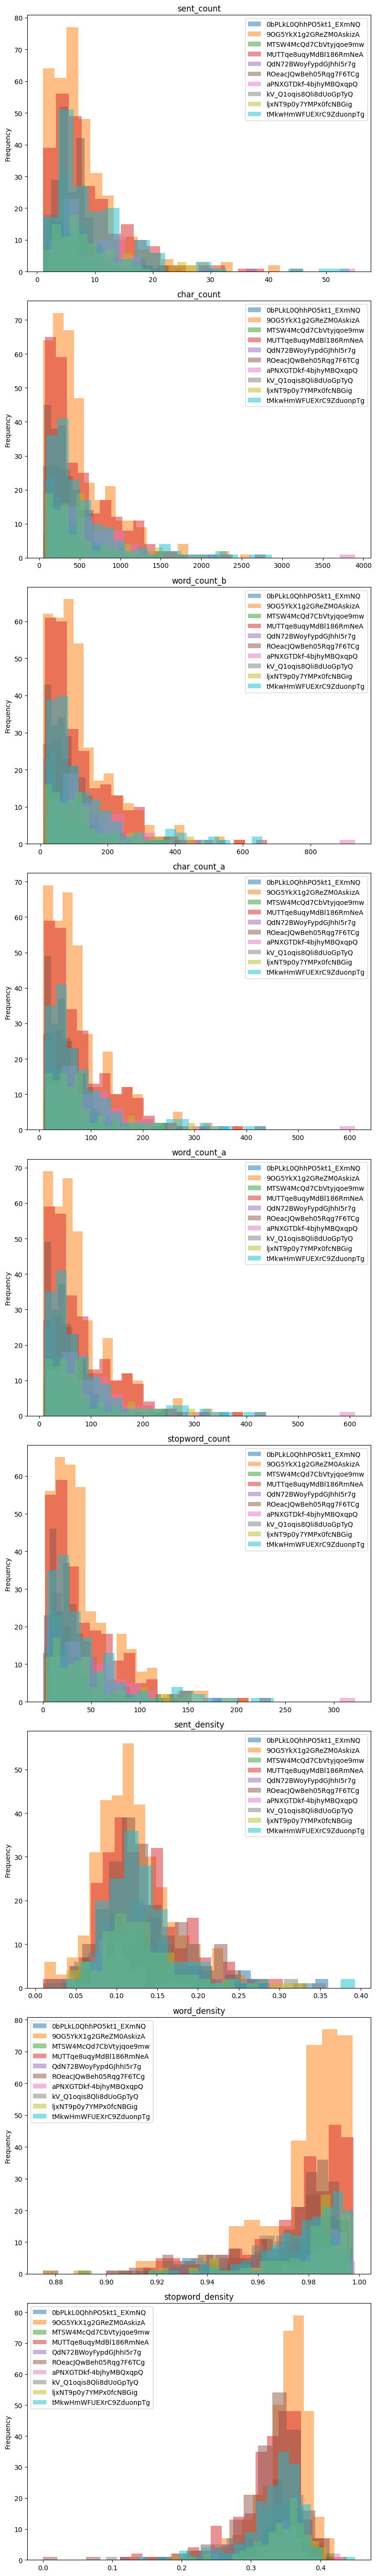

In [29]:
columns_to_plot = ['sent_count', 'char_count', 'word_count_b', 'char_count_a', 'word_count_a', 'stopword_count', 'sent_density', 'word_density', 'stopword_density']

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 6 * len(columns_to_plot)))

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    for label, df in grouped_df:
        df[col].plot(kind="hist", bins=20, alpha=0.5, ax=ax, label=label)

    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

- The above are the histograms whose x-axis is the count and the y-axis is the frequency.
- The above histograms show the frequencies of sentence count, character count, word count after eliminating stop words, character count after eliminating stop words, stop word count, sentence density, word density, density of stop words.
- From the visulaization we can identify the patterns of the reviews and distribution of text related to different metric accross differnt businesses. It gives a comparition accross different businesses.

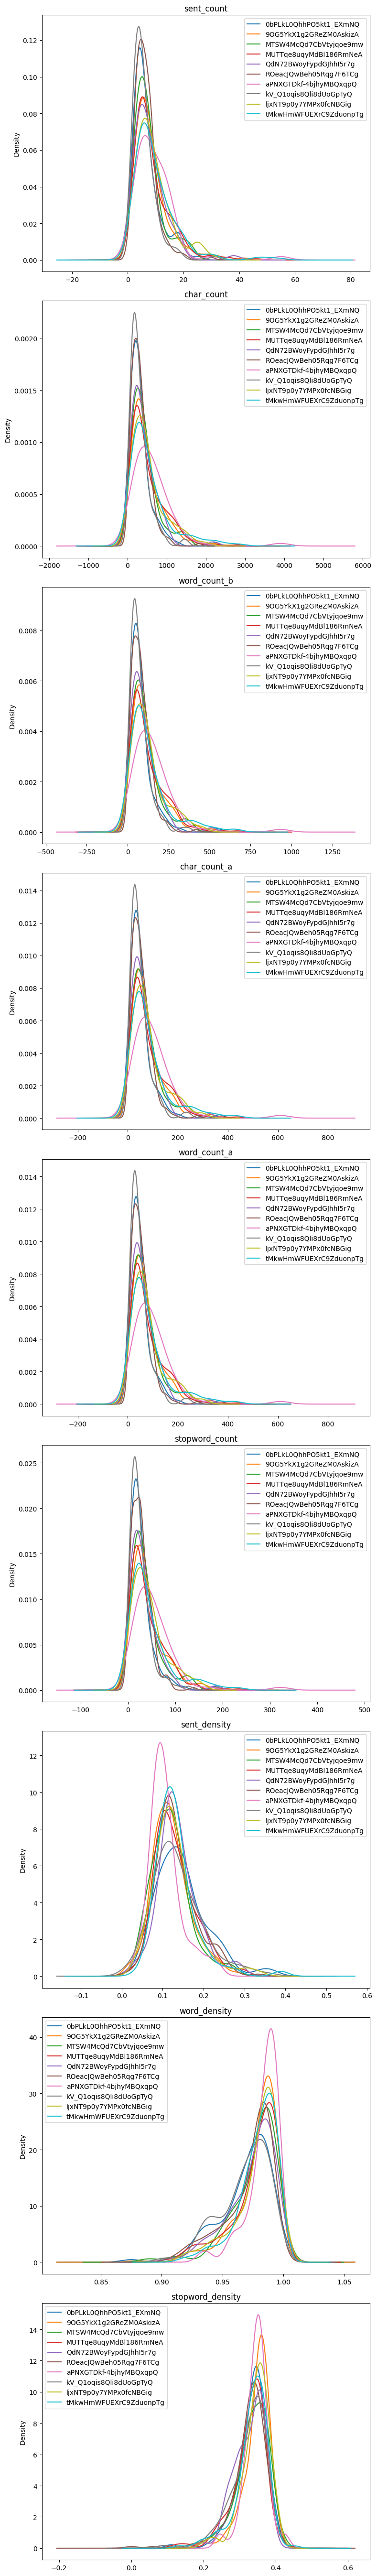

In [30]:
columns_to_plot = ['sent_count', 'char_count', 'word_count_b', 'char_count_a', 'word_count_a', 'stopword_count', 'sent_density', 'word_density', 'stopword_density']

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 6 * len(columns_to_plot)))

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    for label, df in grouped_df:
        df[col].plot(kind="kde", ax=ax, label=label)

    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

- The above are the Kernel Density Estimation plots for different columns in the data frame.
- We can observe the probability density distribution of text metrics related to different businesses.

In [39]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
sr = stopwords.words('english')
for i, tokens in enumerate(clean_review['tokens']):
  for token in tokens:
    if token in stopwords.words('english'):
      clean_review['tokens'][i].remove(token)
clean_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


review_id                 user_id             business_id  \
0     mMwnX1vc3tQUeDNS2wiKFw  f10WH1fXhy-68r4AEEhAWA  9OG5YkX1g2GReZM0AskizA   
1     z_fgvINjKZCw5RgByaTxxw  dldfg-X_QbBkhR2DOsQFWg  QdN72BWoyFypdGJhhI5r7g   
2     rkDzWtbZ2_en8HZDCUbF1Q  -TbX3AYOIEyo6-b67MT8eA  9OG5YkX1g2GReZM0AskizA   
3     XYaDbPKyJAu4k2aUOIth5g  Qsk0aTclam9W_DIK6bx42A  MUTTqe8uqyMdBl186RmNeA   
4     tpLolBuBTx_Ncx3RSf7WBw  TJW1aEzjhaxbD10fjhokfQ  MUTTqe8uqyMdBl186RmNeA   
...                      ...                     ...                     ...   
1517  qNrqLFzUotJXqhO_8k2fEw  BgbMh5k8Gd3YoQOfX915Xw  tMkwHmWFUEXrC9ZduonpTg   
1518  9r-TVMhfk5ncJ_Cc_lprUQ  cC9flaguB3JXdQSghVT03Q  MUTTqe8uqyMdBl186RmNeA   
1519  AJtRqi_xQJs5YoTnuUlaTw  u9kFHr0ZyuvXYejCaxz7ew  aPNXGTDkf-4bjhyMBQxqpQ   
1520  Me2ixr2UWaqnMWTGFwkyRQ  Y_CWjc7mz6jaebDxyyVViw  MUTTqe8uqyMdBl186RmNeA   
1521  yP6qECsUSGs4Jsnr2Pu5KQ  BpfStJAeH3-8mnvZKwh1qg  MUTTqe8uqyMdBl186RmNeA   

                                                   text                 date  \
0     great bar happy hour     every day  wine   dra...  2016-01-30 03:16:46   
1     this place is top notch  with phenomenal servi...  2016-11-10 16:52:33   
2     please  this place makes a semi new menu and r...  2013-04-11 02:40:03   
3     stopped in to check out this new spot around t...  2017-12-16 00:13:06   
4     i live in the neighborhood and used to order a...  2018-04-28 00:46:05   
...                                                 ...                  ...   
1517  everything on the menu is absolutely incredibl...  2020-02-11 14:27:39   
1518  from the ambiance  to the service and the food...  2021-11-29 01:42:04   
1519  went to a frontier event with a friend today a...  2019-04-29 23:48:18   
1520  tuna bar has quickly become a favorite of phil...  2021-12-04 01:21:49   
1521    stars all around  the sushi here is amazing ...  2017-12-31 13:51:49   

                                               sentence  sent_count  \
0     [great bar happy hour 4-7 every day., wine & d...           4   
1     [this place is top notch, with phenomenal serv...          13   
2     [please, this place makes a semi-new menu and ...          15   
3     [stopped in to check out this new spot around ...           9   
4     [i live in the neighborhood and used to order ...           8   
...                                                 ...         ...   
1517  [everything on the menu is absolutely incredib...           3   
1518  [from the ambiance, to the service and the foo...          11   
1519  [went to a frontier event with a friend today ...          14   
1520  [tuna bar has quickly become a favorite of phi...           7   
1521  [5 stars all around!, the sushi here is amazin...          18   

      char_count                                             tokens  \
0            115  [great, bar, happi, hour, everi, day, wine, dr...   
1            623  [place, top, notch, phenomen, servic, fantast,...   
2            603  [pleas, place, make, semi, new, menu, rais, pr...   
3            579  [stop, check, new, spot, around, corner, us, b...   
4            325  [live, neighborhood, use, order, least, week, ...   
...          ...                                                ...   
1517         292  [everyth, menu, absolut, incred, suggest, go, ...   
1518         722  [ambianc, servic, food, wish, could, give, pla...   
1519        1004  [went, frontier, event, friend, today, craft, ...   
1520         496  [tuna, bar, quickli, becom, favorit, philadelp...   
1521         984  [star, around, sushi, amaz, qualiti, tast, sup...   

      word_count_b  char_count_a  word_count_a  stopword_count  sent_density  \
0               27            21            21               6      0.181818   
1              138            93            93              45      0.138298   
2              150            96            96              54      0.154639   
3              136            89            89              47      0.1

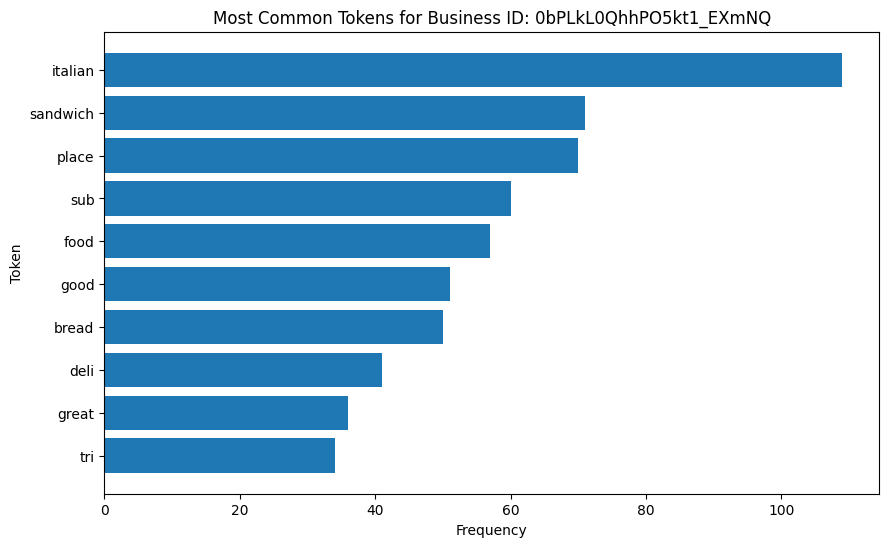

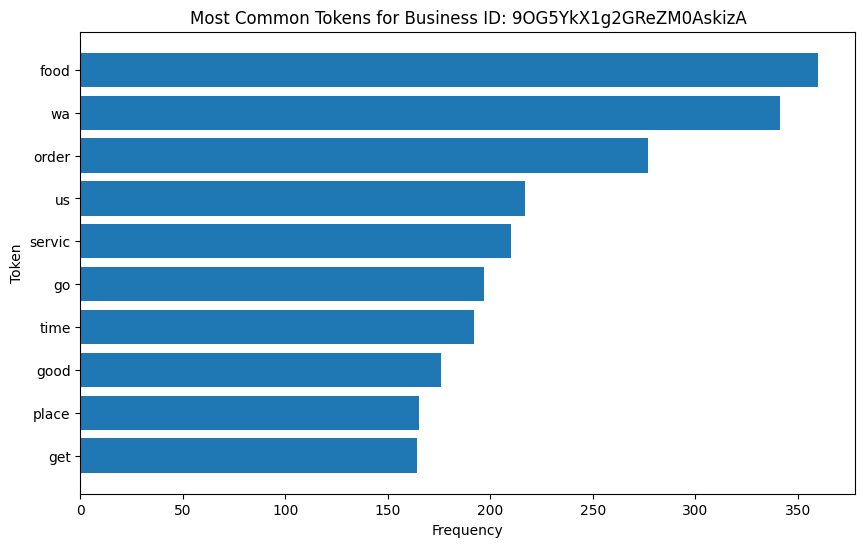

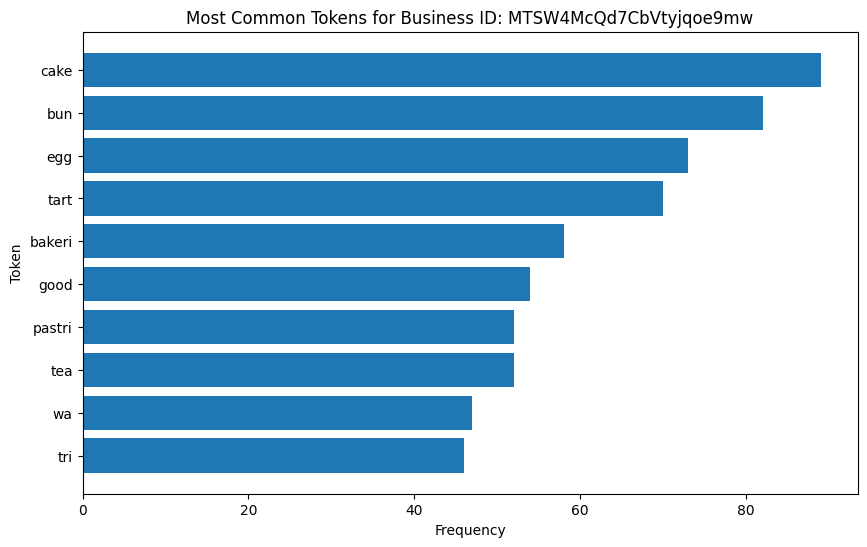

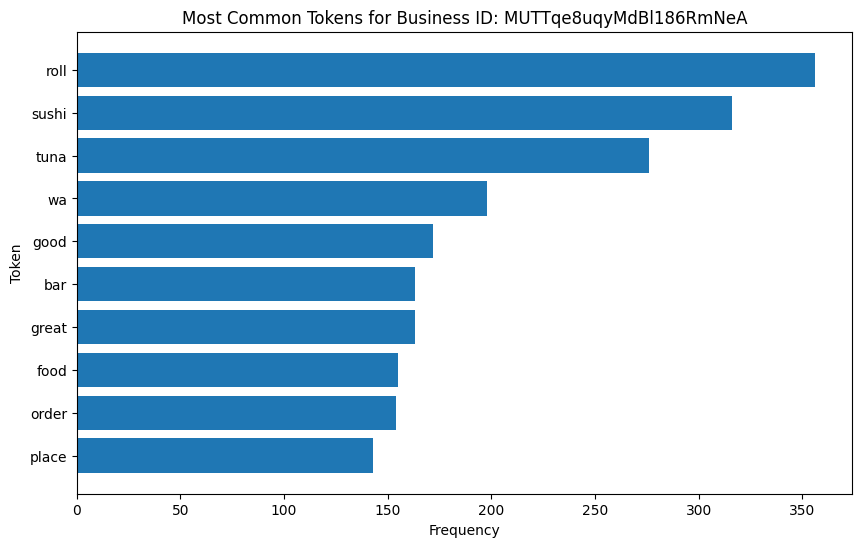

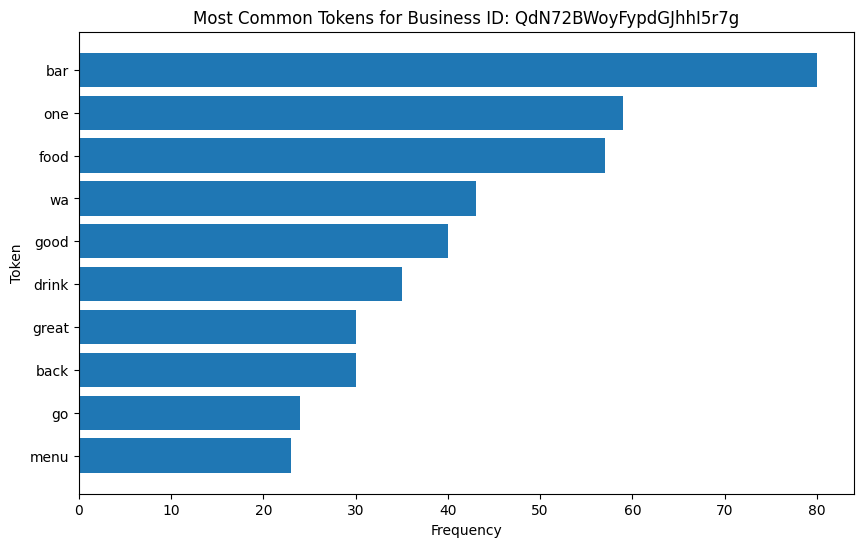

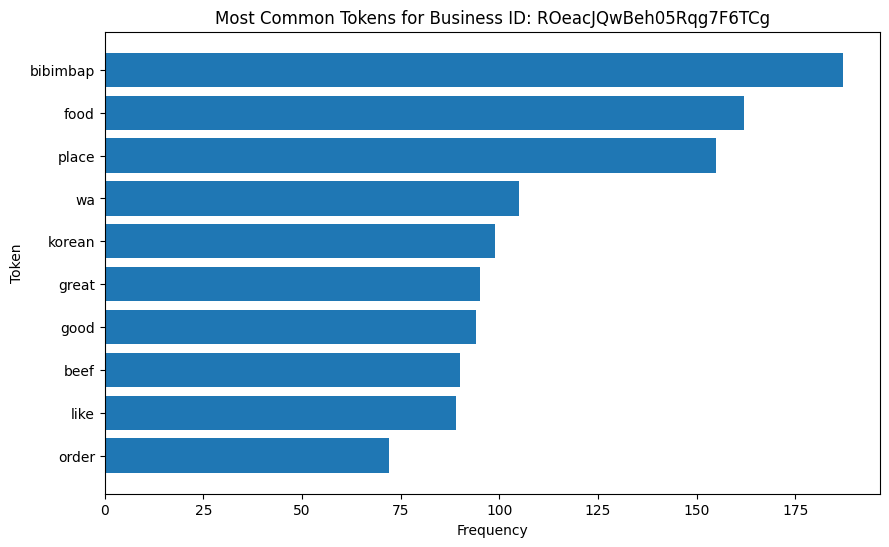

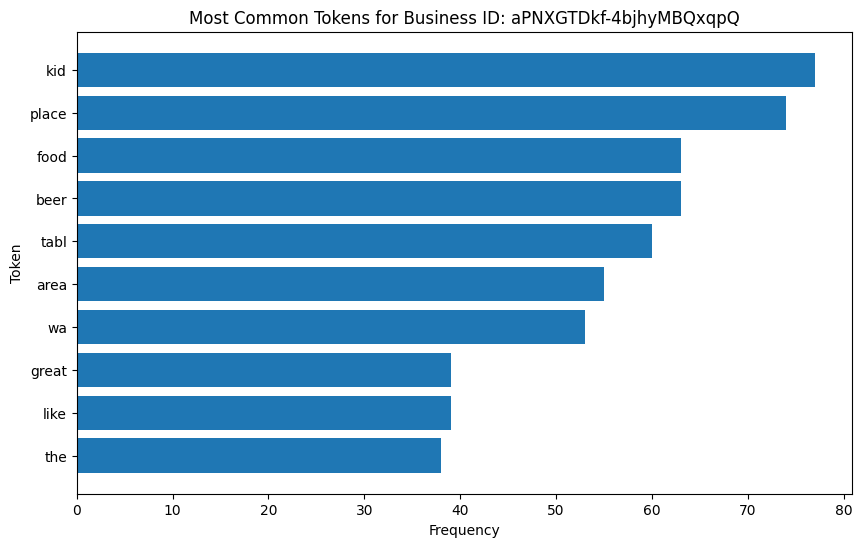

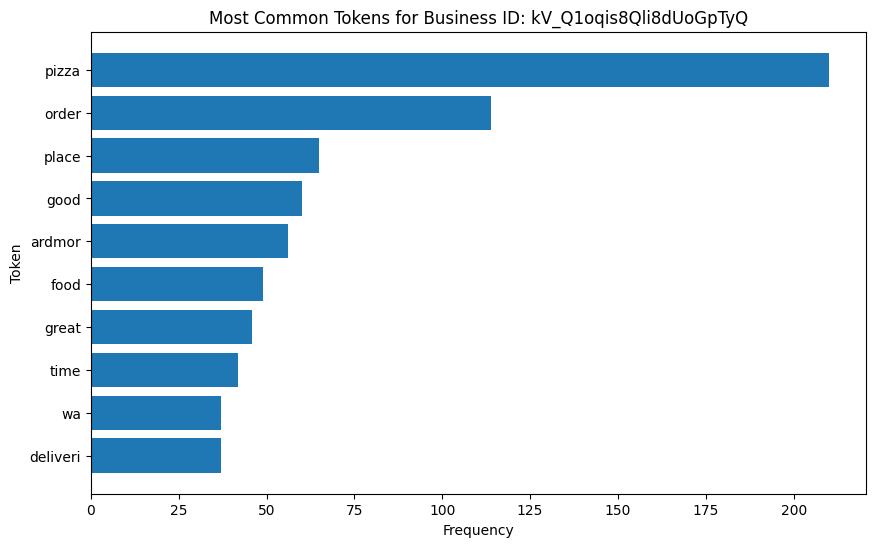

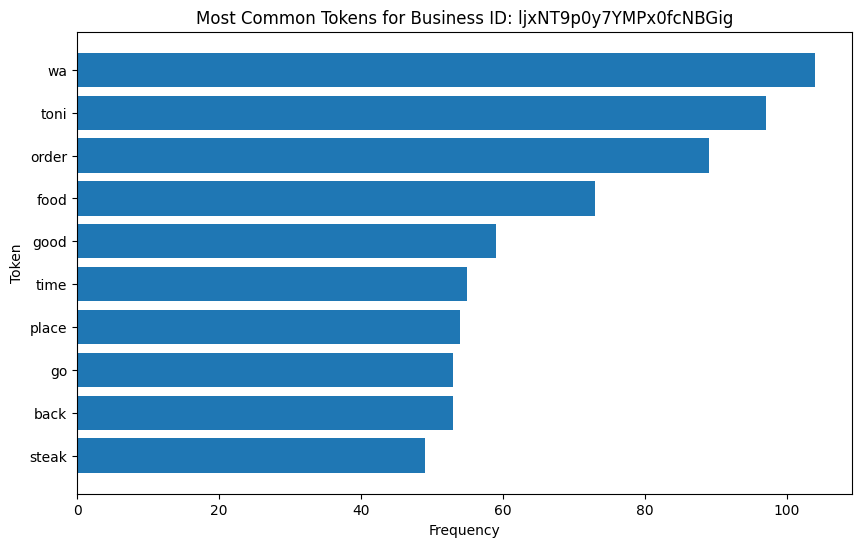

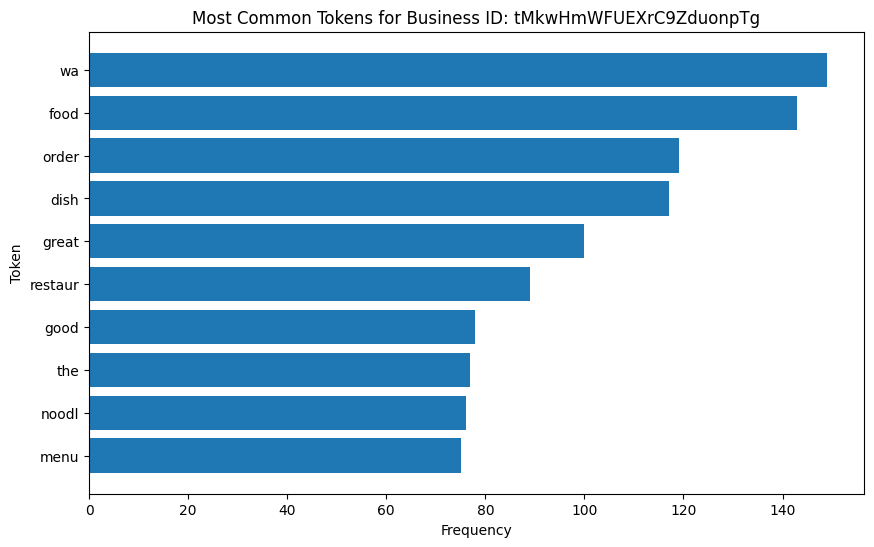

In [40]:
from collections import Counter
import matplotlib.pyplot as plt
top_n = 10

for business_id, group in grouped_df:


    all_tokens = [token for sublist in group['tokens'] for token in sublist]

    token_counts = Counter(all_tokens)

    most_common_tokens = token_counts.most_common(top_n)

    most_common_df = pd.DataFrame(most_common_tokens, columns=['Token', 'Frequency'])

    plt.figure(figsize=(10, 6))
    plt.barh(most_common_df['Token'], most_common_df['Frequency'])
    plt.xlabel('Frequency')
    plt.ylabel('Token')
    plt.title(f'Most Common Tokens for Business ID: {business_id}')
    plt.gca().invert_yaxis()
    plt.show()

- The above graphs represent the most common tokens for different businesses.
- This can be used to understand customer semantics.
- For example in the first graph the most common token used in the reviews is Italian. So if this business has an overall positive review that means people are liking Italian food.

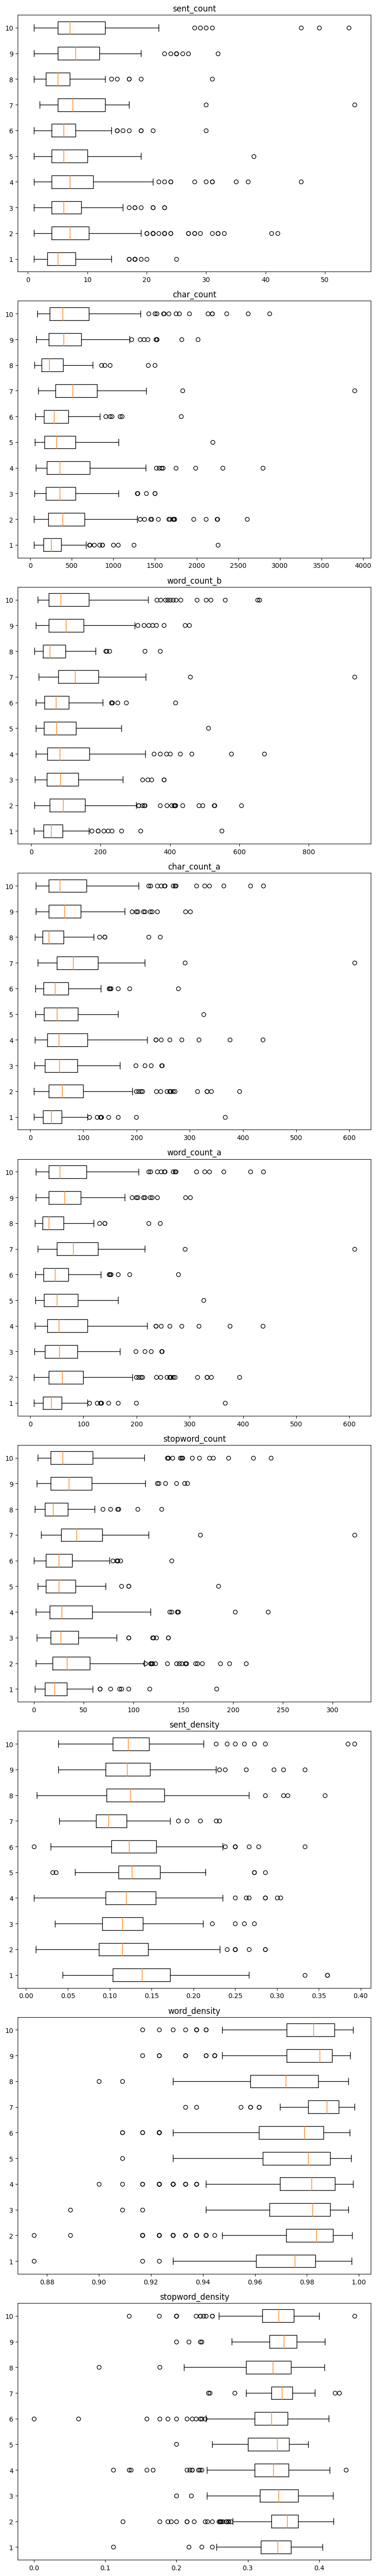

In [32]:
columns_to_plot = ['sent_count', 'char_count', 'word_count_b', 'char_count_a', 'word_count_a', 'stopword_count', 'sent_density', 'word_density', 'stopword_density']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 6 * len(columns_to_plot)))

# Plot each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    # Extract values for the current column from each group and convert them into a list of lists
    data = [group[col].values for _, group in grouped_df]
    # Plot boxplot for the current column
    ax.boxplot(data, vert=False)
    ax.set_title(col)  # Set title for the subplot
    ax.label = []

plt.tight_layout()
plt.show()

- The above are the box plots for different columns like sentence count, character count, word count after removing the stop words, character count after removing the stop words, stop word count, sentence density, word density, and stop word density.

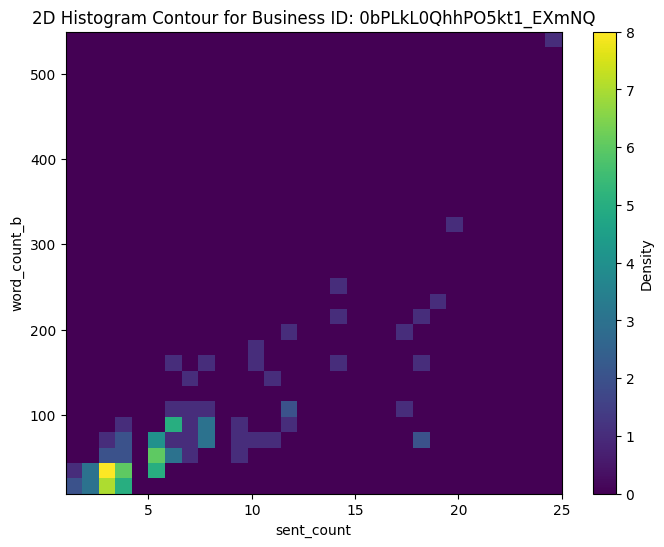

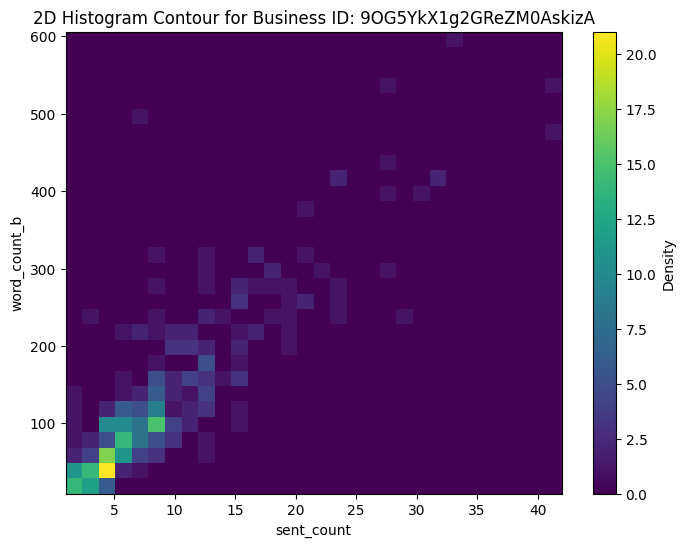

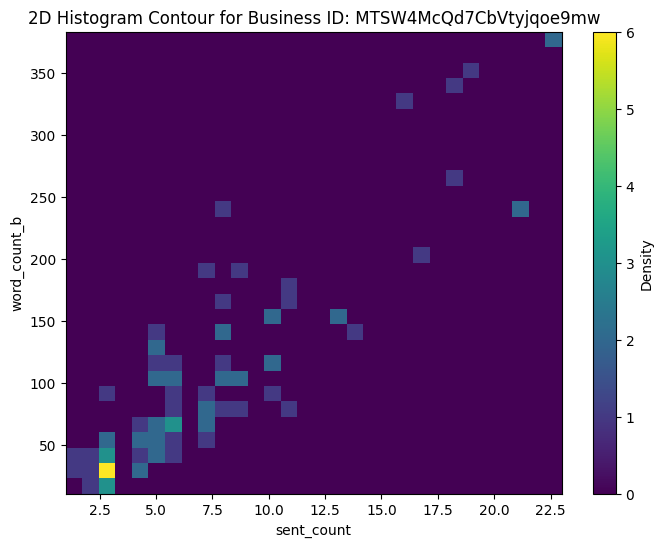

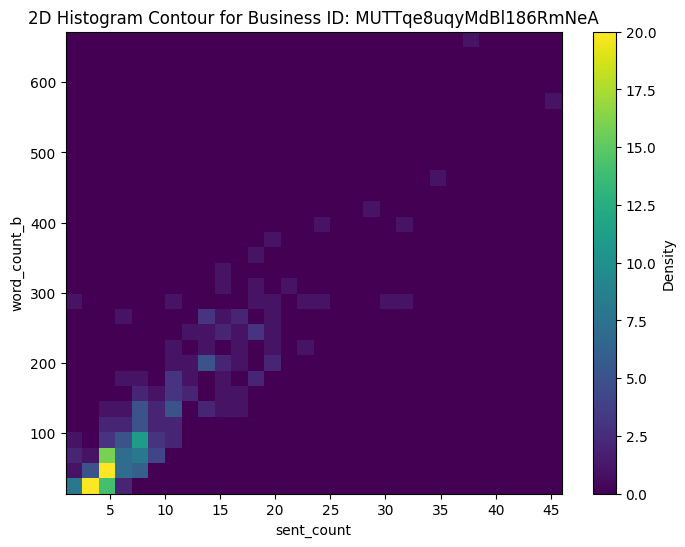

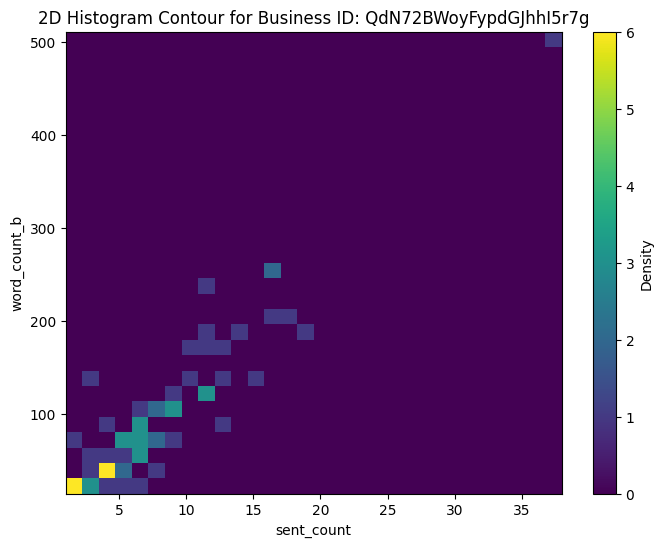

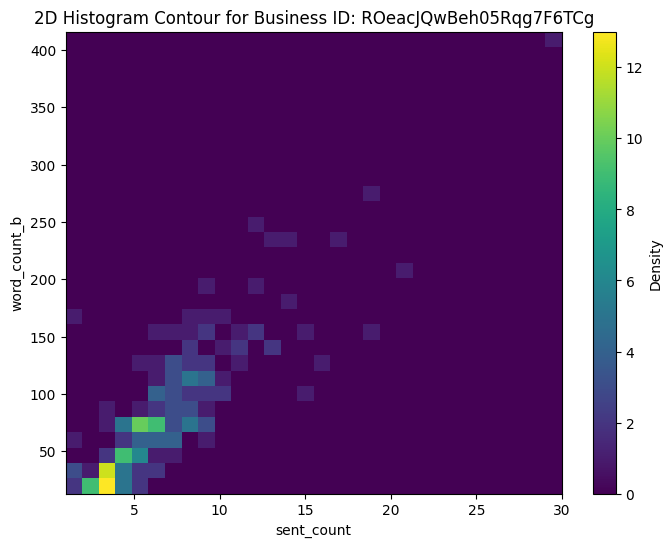

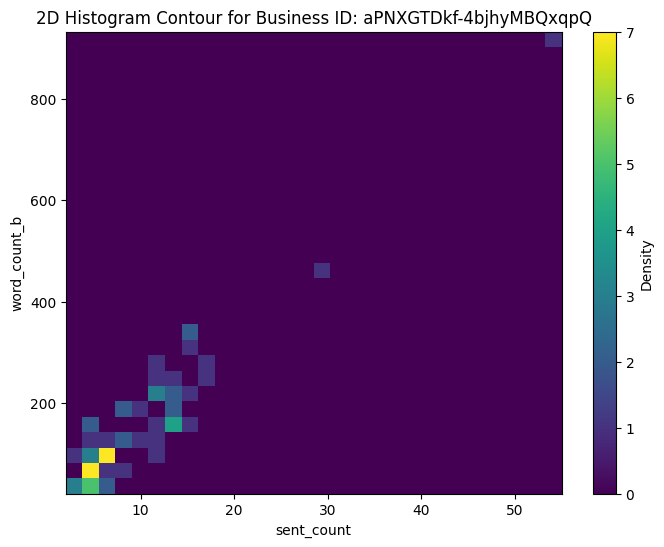

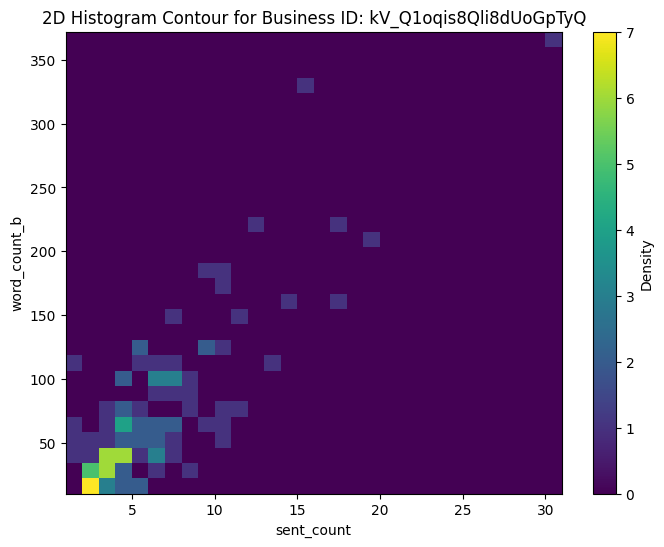

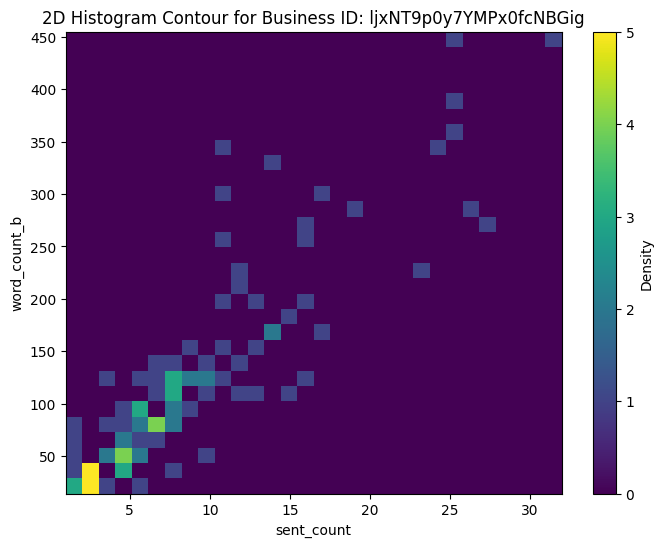

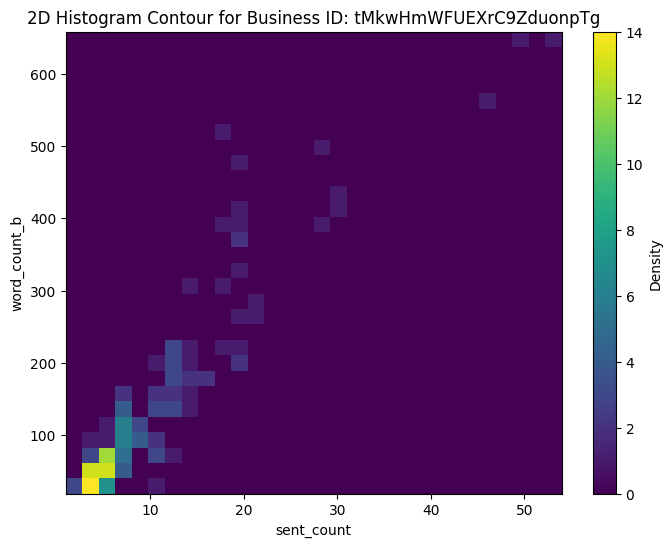

In [33]:
x_column = 'sent_count'
y_column = 'word_count_b'

for business_id, group in grouped_df:
    x_data = group[x_column]
    y_data = group[y_column]


    plt.figure(figsize=(8, 6))
    plt.hist2d(x_data, y_data, bins=30, cmap='viridis')
    plt.colorbar(label='Density')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'2D Histogram Contour for Business ID: {business_id}')
    plt.show()

- The above 2D histogram contour plot represents between sentence count and word count before eliminating the stop words for each business.
- This basically over laps the sentence count and word count.
- For example, as you can see in the first graph, it says that the density is high where is 2 sentences which contains word count between 20 to 30.

# Implementation

In [34]:
data = []

for business_id, group in grouped_df:
    all_reviews = ' '.join(group['text'])
    data.append({'business_id': business_id, 'text': all_reviews})

business_reviews_df = pd.DataFrame(data)

print(business_reviews_df)

              business_id                                               text
0  0bPLkL0QhhPO5kt1_EXmNQ  the worst chicken parm  sandwich i ve ever eat...
1  9OG5YkX1g2GReZM0AskizA  great bar happy hour     every day  wine   dra...
2  MTSW4McQd7CbVtyjqoe9mw  this is nice little chinese bakery in the hear...
3  MUTTqe8uqyMdBl186RmNeA  stopped in to check out this new spot around t...
4  QdN72BWoyFypdGJhhI5r7g  this place is top notch  with phenomenal servi...
5  ROeacJQwBeh05Rqg7F6TCg  this place is fantastic   delicious  simple  h...
6  aPNXGTDkf-4bjhyMBQxqpQ  this is a great place to take guests visiting ...
7  kV_Q1oqis8Qli8dUoGpTyQ  bunch of high school college kids running the ...
8  ljxNT9p0y7YMPx0fcNBGig  we had been driving around for some time  on a...
9  tMkwHmWFUEXrC9ZduonpTg  cute ambience that would be great for date nig...


- The above code combines all the reviews with the business id in one data frame.

In [35]:
tokens = []
for i in business_reviews_df['text']:
  tokens.append(nltk.word_tokenize(i))

business_reviews_df['tokens'] = tokens
business_reviews_df.head()

business_id                                               text  \
0  0bPLkL0QhhPO5kt1_EXmNQ  the worst chicken parm  sandwich i ve ever eat...   
1  9OG5YkX1g2GReZM0AskizA  great bar happy hour     every day  wine   dra...   
2  MTSW4McQd7CbVtyjqoe9mw  this is nice little chinese bakery in the hear...   
3  MUTTqe8uqyMdBl186RmNeA  stopped in to check out this new spot around t...   
4  QdN72BWoyFypdGJhhI5r7g  this place is top notch  with phenomenal servi...   

                                              tokens  
0  [the, worst, chicken, parm, sandwich, i, ve, e...  
1  [great, bar, happy, hour, every, day, wine, dr...  
2  [this, is, nice, little, chinese, bakery, in, ...  
3  [stopped, in, to, check, out, this, new, spot,...  
4  [this, place, is, top, notch, with, phenomenal...

- The above code generates tokens for the text.
- Each word is considered as a token.

In [36]:
from collections import Counter
token_freq_list = []
for i in business_reviews_df['tokens']:

  token_freq_list.append(Counter(i))

business_reviews_df['token_freq'] = token_freq_list
business_reviews_df.head()

business_id                                               text  \
0  0bPLkL0QhhPO5kt1_EXmNQ  the worst chicken parm  sandwich i ve ever eat...   
1  9OG5YkX1g2GReZM0AskizA  great bar happy hour     every day  wine   dra...   
2  MTSW4McQd7CbVtyjqoe9mw  this is nice little chinese bakery in the hear...   
3  MUTTqe8uqyMdBl186RmNeA  stopped in to check out this new spot around t...   
4  QdN72BWoyFypdGJhhI5r7g  this place is top notch  with phenomenal servi...   

                                              tokens  \
0  [the, worst, chicken, parm, sandwich, i, ve, e...   
1  [great, bar, happy, hour, every, day, wine, dr...   
2  [this, is, nice, little, chinese, bakery, in, ...   
3  [stopped, in, to, check, out, this, new, spot,...   
4  [this, place, is, top, notch, with, phenomenal...   

                                          token_freq  
0  {'the': 358, 'worst': 1, 'chicken': 9, 'parm':...  
1  {'great': 119, 'bar': 22, 'happy': 24, 'hour':...  
2  {'this': 68, 'is': 119, 'nice': 14, 'little': ...  
3  {'stopped': 8, 'in': 325, 'to': 571, 'check': ...  
4  {'this': 43, 'place': 18, 'is': 85, 'top': 6, ...

- The above code creates a new column to store the frequencies of each token.
- As you can see in the above table there is a column named as 'token_freq' which stores the frequency of each token.

In [37]:
review_df_grouped = review_df.groupby('business_id')
business_reviews_df['og_text'] = review_df_grouped['text']
for i, row in business_reviews_df.iterrows():
    max_frequency = max(row['token_freq'].values())
    for word in row['token_freq'].keys():
        row['token_freq'][word] = row['token_freq'][word] / max_frequency


tokens = []
for i in business_reviews_df['og_text']:
  all_reviews = ' '.join(i[1])

  tokens.append(nltk.sent_tokenize(all_reviews))


business_reviews_df['sent_token'] = tokens
business_reviews_df = business_reviews_df.drop(columns='og_text')
business_reviews_df.head()


business_id                                               text  \
0  0bPLkL0QhhPO5kt1_EXmNQ  the worst chicken parm  sandwich i ve ever eat...   
1  9OG5YkX1g2GReZM0AskizA  great bar happy hour     every day  wine   dra...   
2  MTSW4McQd7CbVtyjqoe9mw  this is nice little chinese bakery in the hear...   
3  MUTTqe8uqyMdBl186RmNeA  stopped in to check out this new spot around t...   
4  QdN72BWoyFypdGJhhI5r7g  this place is top notch  with phenomenal servi...   

                                              tokens  \
0  [the, worst, chicken, parm, sandwich, i, ve, e...   
1  [great, bar, happy, hour, every, day, wine, dr...   
2  [this, is, nice, little, chinese, bakery, in, ...   
3  [stopped, in, to, check, out, this, new, spot,...   
4  [this, place, is, top, notch, with, phenomenal...   

                                          token_freq  \
0  {'the': 1.0, 'worst': 0.002793296089385475, 'c...   
1  {'great': 0.05584232754575317, 'bar': 0.010323...   
2  {'this': 0.14468085106382977, 'is': 0.25319148...   
3  {'stopped': 0.004839685420447671, 'in': 0.1966...   
4  {'this': 0.1184573002754821, 'place': 0.049586...   

                                          sent_token  
0  [The worst Chicken Parm., Sandwich I've ever e...  
1  [Great bar Happy Hour 4-7 every day., Wine & D...  
2  [This is nice little Chinese bakery in the hea...  
3  [Stopped in to check out this new spot around ...  
4  [This place is top notch, with phenomenal serv...

- The above code normalizes the token frequencies of each business to their maximum frequency.

In [38]:

sentence_scores_list = []
for i, row in business_reviews_df.iterrows():
  for sent in row['sent_token']:
    for word in sent.split():
      if word.lower() in row['token_freq'].keys():
        if sent not in sentence_scores.keys():
          sentence_scores[sent] = row['token_freq'][word.lower()]
        else:
          sentence_scores[sent] += row['token_freq'][word.lower()]
  sentence_scores_list.append(sentence_scores)
  sentence_scores = {}
business_reviews_df['sent_score'] = sentence_scores_list
business_reviews_df.head()

NameError: name 'sentence_scores' is not defined

- The above code calculates a score for each sentence in the text based on the frequency  occured in each business.

In [ ]:
from heapq import nlargest
summary_list = []
for i, row in business_reviews_df.iterrows():
    max_frequency = max(row['token_freq'].values())
    select_length = int(len(row['sent_token']) * 0.3)
    summary = nlargest(select_length, row['sent_score'], key=row['sent_score'].get)
    final_summary = [re.sub(r'\n', '', word) for word in summary]
    summary = ' '.join(final_summary)
    summary_list.append(summary)

business_reviews_df['summary'] = summary_list
business_reviews_df.head()

- The above code is used to summarize all the reviews of a particular business.
- The sentences are selected based on the score that is generated in the above step.
The top 30 sentences are chosen.
- Then it cleans the extra lines and combines them and stores it in a new column,

In [ ]:
!pip install vaderSentiment

- Install vaderSentiment for sentiment analysis.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):

    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

- The above code calculates the score using VADER sentiment tool of the summarised data.

In [ ]:
sentiment = []
for i, row in business_reviews_df.iterrows():
    sentence = row['summary']
    score = sentiment_scores(sentence)
    sentiment.append(score['compound'])



business_reviews_df['sentiment'] = sentiment
business_reviews_df.head()

- The sentiment score is calculated and stored in the new column.
- In the above table you can see the sentiment column contains the score.

Overall text sentiment

In [ ]:
sentiment = []
for i, row in business_reviews_df.iterrows():
    sentence = row['text']
    score = sentiment_scores(sentence)
    sentiment.append(score['compound'])


sentiment
#business_reviews_df['sentiment'] = sentiment
#business_reviews_df.head()

In [ ]:
#needs to do rogue for evaluating

Dont run below